<a href="https://colab.research.google.com/github/avadhani123/Practical-Machine-Learning/blob/master/Assignment1__avadhani_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Packages**

In [ ]:

# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

In [ ]:

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [ ]:

print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.4.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.4.0


**Loading MNST Data Set and data preprocessing**

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


EDA Testing and Training Data

In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


**Initial EDA**


In [ ]:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


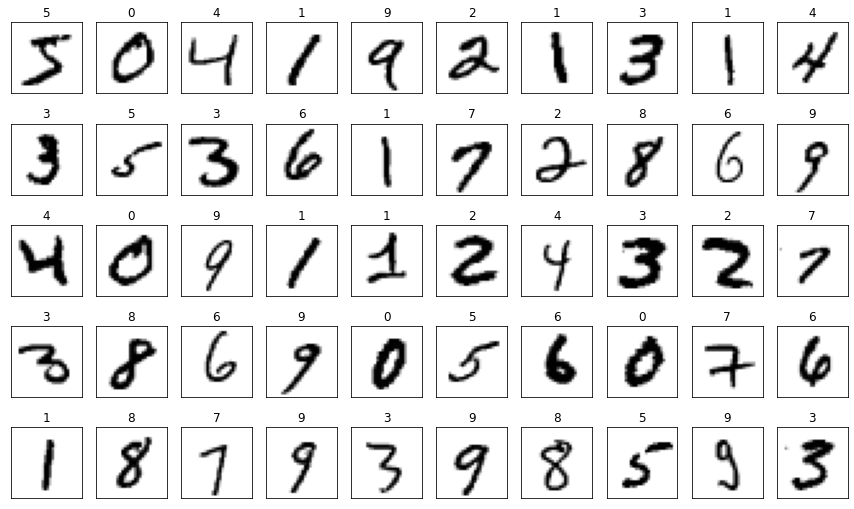

In [ ]:

fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

In [239]:

x_train_reshaped_1 = np.reshape(x_train, (60000, 784))
x_test_reshaped_1 = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)



**EXPERIMENT 1:**

**This network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. 5,000 of the 60,000 training images are held back for validation. After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot. The overlap between the range of values in the "boxes" is expected to be minimal.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

**Building the Model**

In [ ]:
model_1 = models.Sequential()
model_1.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,)))
model_1.add(layers.Dense(10, activation='softmax'))

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 785       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


Reshaping Data for Compiliation

In [240]:
x_train_reshaped_1 = np.reshape(x_train, (60000, 784))
x_test_reshaped_1 = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [241]:

np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [242]:
x_train_norm_1 = x_train_reshaped.astype('float32') / 255
x_test_norm_1 = x_test_reshaped.astype('float32') / 255

In [243]:
print(set(x_train_norm_1[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.52156866, 0.7882353, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.9490196, 0.7647059, 0.88235295, 0.99215686, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.83137256, 0.98039216, 0.95686275, 0.003921569, 0.73333335, 0.54509807, 0.5294118, 0.67058825, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.42352942, 0.627451, 0.9411765, 0.9882353, 0.5176471, 0.09803922, 0.1764706}


**Compiling the Model**

In [244]:
model_1.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [245]:
y_train_encoded_1 = to_categorical(y_train)
y_test_encoded_1 = to_categorical(y_test)


print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [246]:
print('y_test_encoded shape: ', y_test_encoded_1.shape)

y_test_encoded shape:  (10000, 10)


In [247]:
model_1.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [248]:
history = model_1.fit(
    x_train_norm_1
    ,y_train_encoded_1
    ,epochs = 20
    ,validation_split=0.20 
    #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6320 - accuracy: 0.3755 - val_loss: 1.6115 - val_accuracy: 0.3816
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6237 - accuracy: 0.3841 - val_loss: 1.6134 - val_accuracy: 0.3824
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6208 - accuracy: 0.3795 - val_loss: 1.6120 - val_accuracy: 0.3832
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6319 - accuracy: 0.3814 - val_loss: 1.6133 - val_accuracy: 0.3801
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6245 - accuracy: 0.3814 - val_loss: 1.6135 - val_accuracy: 0.3848
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6296 - accuracy: 0.3785 - val_loss: 1.6131 - val_accuracy: 0.3809
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 1.6248 - accuracy: 0.3808 - val_loss: 1.6133 - val_accuracy:

**Testing the Model**


In [249]:
loss, accuracy = model_1.evaluate(x_test_norm_1, y_test_encoded_1)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 1ms/step - loss: 1.6287 - accuracy: 0.3799
test set accuracy:  37.99000084400177


**Plotting Model Performance**

In [250]:
history_dict = history.history
history_dict.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [251]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

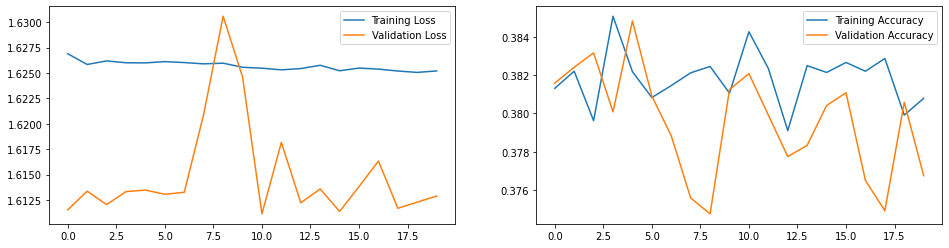

In [252]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

**Creating Confusion Matrix**

In [253]:

# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model_1.predict(x_train_norm_1), axis=-1)
pred_classes

array([0, 0, 6, ..., 3, 1, 3])

In [255]:
conf_mx = tf.math.confusion_matrix(y_train, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4896,    2,   23,  856,    7,    0,    2,  117,    0,   20],
       [   0, 5638,   15,   21,  291,    0,  684,   25,    0,   68],
       [ 123,  460,  811,  966,  673,    0,  218, 1594,    0, 1113],
       [ 995,   20,  254, 3321,   81,    0,   16, 1198,    0,  246],
       [   1,  513,  370,   21, 2217,    0,  675,  191,    0, 1854],
       [ 637,   29,  218, 3037,   69,    0,   15, 1214,    0,  202],
       [   6, 3889,  120,   83,  697,    0,  533,  205,    0,  385],
       [  98,   69,  478, 2010,  256,    0,   63, 2743,    0,  548],
       [ 128,  120,  909, 1007,  506,    0,  128, 1904,    0, 1149],
       [  24,   76, 1103,  177,  963,    0,  143,  803,    0, 2660]], dtype=int32)>

In [257]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

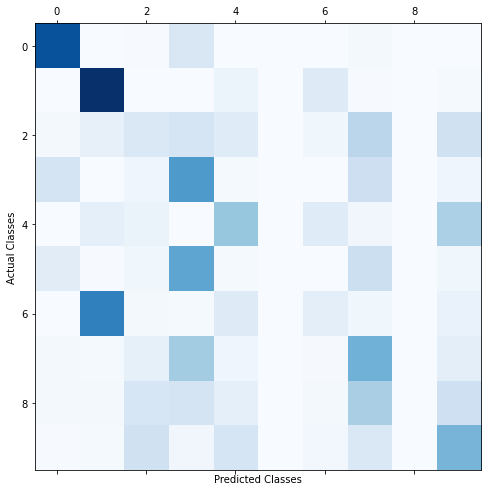

In [258]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

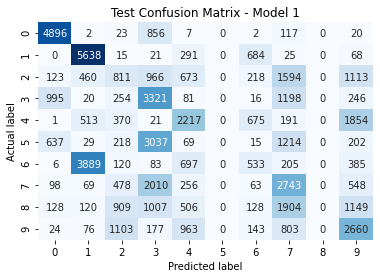

In [259]:
m1_cm_plt=sns.heatmap(conf_mx, square=False, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Test Confusion Matrix - Model 1")
plt.show();

**Get the Activation values of the nodes**

In [260]:
# Extract the outputs of the 2 layers
layer_outputs = [layer.output for layer in model_1.layers]

# Create a model that will return these outputs, given the model input
activation_model_1 = models.Model(inputs=model_1.input, outputs=layer_outputs)

# Print a description of the layers
print(f"There are {len(layer_outputs)} layers")
layer_outputs

There are 2 layers


[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_4')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>]

In [267]:
activations = activation_model_1.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape   #  hidden node has one activation value per training image

(55000, 1)

In [268]:
print(f"The maximum activation value of the hidden node is {hidden_layer_activation.max()}")

The maximum activation value of the hidden node is 10.910744667053223


In [269]:
# Output layer stats
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.001 0.002 0.199 0.051 0.134 0.051 0.024 0.153 0.18  0.207]
The sum of the probabilities is (approximately) 1.0


**Activation Values Boxplot Visualization**

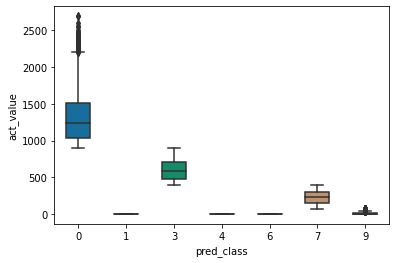

In [275]:
bplot = sns.boxplot(y='act_value', x='pred_class', 
                 data=boxplot_df, 
                 width=0.5,
                 palette="colorblind")
# bplot.savefig("act_values_model_1.png")

figure = bplot.get_figure()    

**Error Analysis**

In [277]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

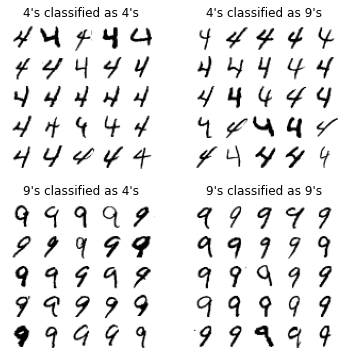

In [278]:
cl_a, cl_b = 4, 9
X_aa = x_train_norm[(y_train == cl_a) & (pred_classes == cl_a)]
X_ab = x_train_norm[(y_train == cl_a) & (pred_classes == cl_b)]
X_ba = x_train_norm[(y_train == cl_b) & (pred_classes == cl_a)]
X_bb = x_train_norm[(y_train == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(6,6))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

**EXPERIMENT 2**

 **This time our dense neural network will have 784 input nodes, a hidden layer with 2 nodes and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to which of the 10 classes the the output of the two nodes predicts. Ideally, just like in EXPERIMENT 1, the color clusters should have very little overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.**



**Building the Network**

In [279]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

In [280]:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [281]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [282]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [283]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

In [284]:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.52156866, 0.7882353, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.9490196, 0.7647059, 0.88235295, 0.99215686, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.83137256, 0.98039216, 0.95686275, 0.003921569, 0.73333335, 0.54509807, 0.5294118, 0.67058825, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.42352942, 0.627451, 0.9411765, 0.9882353, 0.5176471, 0.09803922, 0.1764706}


In [285]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


**Compiling and training the Model **

In [286]:
model_2.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [298]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [299]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

In [300]:


train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [301]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [348]:
pred_classes = np.argmax(model_2.predict(train_images), axis=-1)

In [349]:
pred_classes.shape

(55000,)

In [307]:
history_2 = model_2.fit(train_images, train_labels, validation_data=(val_images, val_labels), 
                      epochs=30)


Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9468 - accuracy: 0.7077 - val_loss: 0.9881 - val_accuracy: 0.7076
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9471 - accuracy: 0.7082 - val_loss: 0.9872 - val_accuracy: 0.7122
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9463 - accuracy: 0.7089 - val_loss: 0.9904 - val_accuracy: 0.7106
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9470 - accuracy: 0.7065 - val_loss: 0.9926 - val_accuracy: 0.7100
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9470 - accuracy: 0.7073 - val_loss: 0.9848 - val_accuracy: 0.7150
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9465 - accuracy: 0.7081 - val_loss: 0.9901 - val_accuracy: 0.7056
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.9466 - accuracy: 0.7083 - val_loss: 0.9866 - val_accuracy:

**Plotting the Model's Performance, accuracy and confusion matrix**

In [309]:
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
history_dict.keys()
history_dict = history_2.history




313/313 [==============================] - 0s 1ms/step - loss: 0.9752 - accuracy: 0.7088


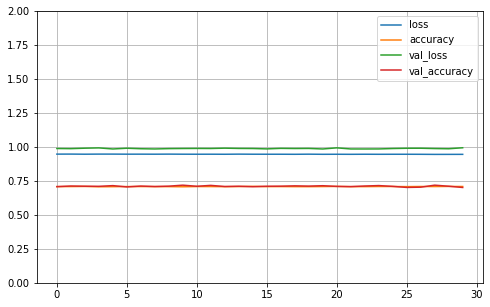

In [380]:
pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1]
plt.show()

**Creating Confusion Matrix**

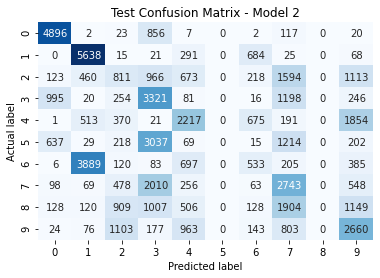

In [318]:
m2_cm_plt=sns.heatmap(conf_mx, square=False, annot=True, fmt='d', cbar=False, cmap="Blues")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Test Confusion Matrix - Model 2")
plt.show();

** Get the activation values of the hidden node**


In [320]:
# Extract the outputs of the 2 layers
layer_outputs = [layer.output for layer in model_2.layers]

# Create a model that will return these outputs, given the model input
activation_model_2 = models.Model(inputs=model_2.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs # description of the layers

There are 2 layers


[<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_12')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_13')>]

In [321]:
activations = activation_model_2.predict(train_images)
hidden_layer_activation = activations[0]
hidden_layer_activation.shape  

(55000, 2)

In [326]:
hidden_node1_activation = hidden_layer_activation[:,0] # get activation values of the first hidden node
hidden_node2_activation = hidden_layer_activation[:,1] # get activation values of the second hidden node

print(f"The maximum activation value of the first hidden node is {hidden_node1_activation.max()}")
print(f"The maximum activation value of the second hidden node is {hidden_node2_activation.max()}")

The maximum activation value of the first hidden node is 73.97769165039062
The maximum activation value of the second hidden node is 48.876094818115234


In [329]:
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (55000, 10)
The output for the first image are [0.    0.123 0.    0.    0.    0.    0.    0.847 0.    0.03 ]
The sum of the probabilities is (approximately) 1.0000001192092896


In [330]:
hidden_node1_activation.shape

(55000,)

In [331]:
hidden_node2_activation.shape

(55000,)

Activation Scatterplots

In [355]:

scatterPlot_df =  pd.DataFrame({'act_value_h1':hidden_node1_activation,
                                'act_value_h2':hidden_node2_activation,
                                'pred_class':pred_classes})
scatterPlot_df.head()


,act_value_h1,act_value_h2,pred_class
0,23.563972,17.959457,7
1,5.843317,9.534642,3
2,9.990742,2.494029,4
3,0.000000,5.716850,6
4,8.832564,14.141270,1


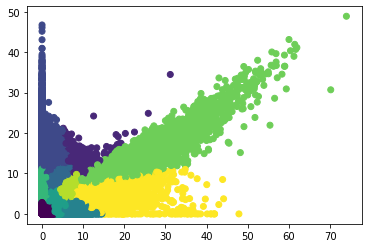

In [357]:
plt.scatter(scatterPlot_df.act_value_h1, 
            scatterPlot_df.act_value_h2, 
            c=scatterPlot_df.pred_class,
            label=scatterPlot_df.pred_class)

plt.show()





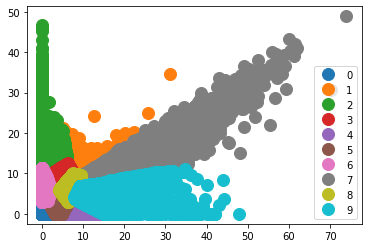

In [359]:
groups = scatterPlot_df.groupby('pred_class')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.act_value_h1, group.act_value_h2, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

**Error Analysis on Model 2**

In [360]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary', **options)
    plt.axis("off")

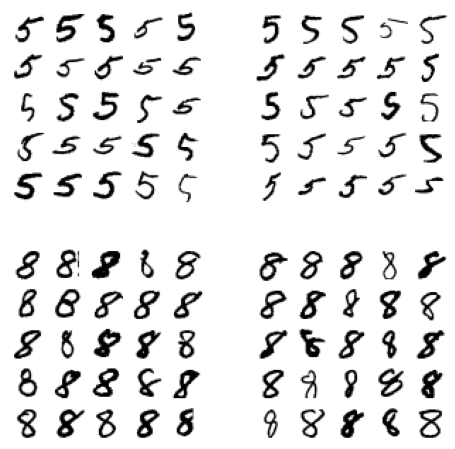

In [361]:
cl_a, cl_b = 5, 8
X_aa = train_images[(train_labels == cl_a) & (pred_classes == cl_a)]
X_ab = train_images[(train_labels == cl_a) & (pred_classes == cl_b)]
X_ba = train_images[(train_labels == cl_b) & (pred_classes == cl_a)]
X_bb = train_images[(train_labels == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.savefig("error_analysis_digits_plot_EXP1_valid")
plt.show()

**Experiment 3** *I will  fine-tune the hyperparameters of the model until we find the 'best' model according to the selected metrics**

In [407]:
#1 hidden layer by default

def build_model(n_hidden=2, n_neurons=2, learning_rate=0.001, input_shape=(28 * 28,)):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dropout(0.25))
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,  metrics=['accuracy'])
    return model

In [408]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
keras_clf = KerasClassifier(build_model)

In [409]:
param_grid = {'n_neurons': range(70,91)}
param_grid

{'n_neurons': range(70, 91)}

In [410]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=keras_clf, param_grid=param_grid,cv=3,verbose = 2)
grid_cv.fit(train_images, train_labels, epochs=30,
                  validation_data=(val_images, val_labels),
                  callbacks=[keras.callbacks.EarlyStopping(patience=2)])

Fitting 3 folds for each of 21 candidates, totalling 63 fits
[CV] n_neurons=70 ....................................................
Epoch 1/30


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1146/1146 [==============================] - 3s 2ms/step - loss: 0.6830 - accuracy: 0.7948 - val_loss: 0.1892 - val_accuracy: 0.9470
Epoch 2/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1988 - accuracy: 0.9418 - val_loss: 0.1342 - val_accuracy: 0.9612
Epoch 3/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1428 - accuracy: 0.9578 - val_loss: 0.1178 - val_accuracy: 0.9648
Epoch 4/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1093 - accuracy: 0.9667 - val_loss: 0.1095 - val_accuracy: 0.9666
Epoch 5/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.0852 - accuracy: 0.9741 - val_loss: 0.1014 - val_accuracy: 0.9696
Epoch 6/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.1047 - val_accuracy: 0.9740
Epoch 7/30
573/573 [==============================] - 1s 2ms/step - loss: 0.1182 - accuracy: 0.9671
[CV] ..................................... n_ne

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.6s remaining:    0.0s


Epoch 1/30
1146/1146 [==============================] - 3s 2ms/step - loss: 0.7102 - accuracy: 0.7789 - val_loss: 0.1762 - val_accuracy: 0.9482
Epoch 2/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1926 - accuracy: 0.9434 - val_loss: 0.1395 - val_accuracy: 0.9580
Epoch 3/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1378 - accuracy: 0.9591 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 4/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.1025 - accuracy: 0.9696 - val_loss: 0.0994 - val_accuracy: 0.9698
Epoch 5/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.0848 - accuracy: 0.9726 - val_loss: 0.0957 - val_accuracy: 0.9720
Epoch 6/30
1146/1146 [==============================] - 2s 2ms/step - loss: 0.0692 - accuracy: 0.9790 - val_loss: 0.1026 - val_accuracy: 0.9702
Epoch 7/30
573/573 [==============================] - 1s 2ms/step - loss: 0.1289 - accuracy: 0.9667
[CV] ...............................

[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed: 23.9min finished


1719/1719 [==============================] - 4s 2ms/step - loss: 0.5367 - accuracy: 0.8350 - val_loss: 0.1344 - val_accuracy: 0.9596
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1399 - accuracy: 0.9569 - val_loss: 0.0991 - val_accuracy: 0.9742
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0984 - accuracy: 0.9698 - val_loss: 0.0909 - val_accuracy: 0.9752
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0795 - accuracy: 0.9751 - val_loss: 0.0908 - val_accuracy: 0.9742
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9795 - val_loss: 0.0745 - val_accuracy: 0.9796
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0832 - val_accuracy: 0.9780
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9858 - val_loss: 0.0845 - val_accuracy: 0.9772


GridSearchCV(cv=3, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fa43f5ca2b0>,
             iid='deprecated', n_jobs=None,
             param_grid={'n_neurons': range(70, 91)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=2)

**Evauluating for the best estimator and then model**

In [411]:
grid_cv.best_params_

{'n_neurons': 87}

In [412]:
#comparing the performance compared to the other 100 models
results = grid_cv.cv_results_
results

{'mean_fit_time': array([16.783, 17.751, 22.562, 22.005, 20.596, 20.357, 20.059, 20.254, 21.393, 20.363, 20.435, 22.091, 22.022, 20.133, 20.768, 25.089, 23.491, 24.591, 24.984, 24.428, 23.674]),
 'mean_score_time': array([1.007, 1.005, 1.009, 1.049, 1.036, 1.053, 1.038, 1.066, 1.063, 1.079, 1.018, 1.114, 1.13 , 1.121, 1.201, 1.268, 1.21 , 1.184, 1.202, 1.141, 1.191]),
 'mean_test_score': array([0.968, 0.967, 0.969, 0.97 , 0.97 , 0.966, 0.967, 0.968, 0.968, 0.969, 0.968, 0.969, 0.968, 0.97 , 0.964, 0.968, 0.969, 0.971, 0.97 , 0.969, 0.969]),
 'param_n_neurons': masked_array(data=[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
              mask=[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neurons': 70},
  {'n_neurons': 71},
  {'n_neurons': 72},
  {'n_neurons': 73},
  {'n_neurons':

In [413]:

results['params'], results['rank_test_score']

([{'n_neurons': 70},
  {'n_neurons': 71},
  {'n_neurons': 72},
  {'n_neurons': 73},
  {'n_neurons': 74},
  {'n_neurons': 75},
  {'n_neurons': 76},
  {'n_neurons': 77},
  {'n_neurons': 78},
  {'n_neurons': 79},
  {'n_neurons': 80},
  {'n_neurons': 81},
  {'n_neurons': 82},
  {'n_neurons': 83},
  {'n_neurons': 84},
  {'n_neurons': 85},
  {'n_neurons': 86},
  {'n_neurons': 87},
  {'n_neurons': 88},
  {'n_neurons': 89},
  {'n_neurons': 90}],
 array([15, 19, 10,  4,  5, 20, 18, 16, 17,  9, 13, 11, 12,  2, 21, 14,  8,  1,  3,  6,  7], dtype=int32))

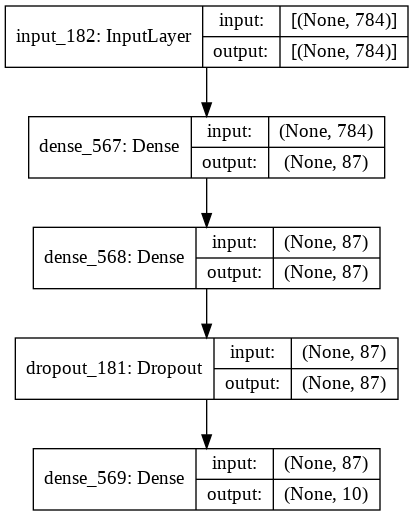

In [415]:
best_model = grid_cv.best_estimator_.model
keras.utils.plot_model(best_model, show_shapes=True)

In [416]:
best_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9746


[0.0899413451552391, 0.9746000170707703]

**EXPERIMENT** 4:
 **Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4 bold text. **


In [362]:

pca = PCA(n_components=0.95)
train_images_red = pca.fit_transform(train_images)
val_images_red = pca.transform(val_images)
test_images_red = pca.transform(test_images)

In [363]:
test_images_red.shape, train_images_red.shape, val_images_red.shape

((10000, 154), (55000, 154), (5000, 154))

**Building the Model**

In [365]:
model_4 = models.Sequential()
model_4.add(layers.Dense(700, activation='sigmoid', input_shape=(28 * 28,)))
model_4.add(layers.Dense(10, activation='softmax'))

In [366]:
model_4.summary()

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_370 (Dense)            (None, 700)               549500    
_________________________________________________________________
dense_371 (Dense)            (None, 10)                7010      
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________


**Compile and Train Model** training on 555000 samples and validating on 5000 samples


In [368]:
model_4.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [370]:
history_4 = model_4.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels),
                    #callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                    )

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0905 - val_accuracy: 0.9788
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0725 - val_accuracy: 0.9838
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0882 - val_accuracy: 0.9804
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0931 - val_accuracy: 0.9808
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 7.8981e-04 - accuracy: 0.9999 - val_loss: 0.0925 - val_accuracy: 0.9822
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0835 - val_accuracy: 0.9810
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0870 - val_ac

In [377]:
hist_dict = history_4.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [378]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 0.9999, val acc: 0.9842,
loss: 0.0005341, val loss: 0.09554


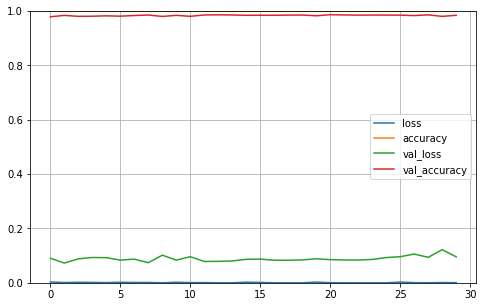

In [379]:
pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.show()

**Comparison of Experiment 3 and 4 **

In [ ]:
##explain later

**EXPERIMENT 5: We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.**

In [381]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(train_images,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

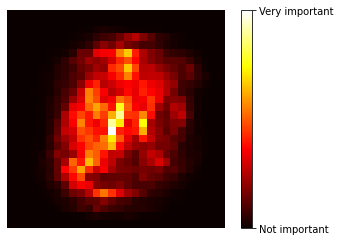

In [383]:
import matplotlib as mpl
# import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

In [384]:

# Get the indices of the 70 most "important" features
# https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [385]:
# Create training, validation and test images using just the 70 pixel locations obtained above
train_images_sm = train_images[:,idx]
val_images_sm = val_images[:,idx]
test_images_sm = test_images[:,idx]
train_images_sm.shape, val_images.shape, test_images_sm.shape # the reduced images have dimension 70

((55000, 70), (5000, 784), (10000, 70))

**Visualizing the 70 pixels**

In [387]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

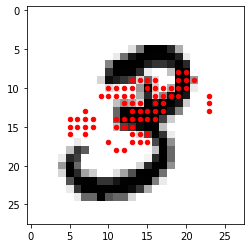

In [388]:
plt.imshow(train_images[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [390]:
# If loading previous model:
# model = model_5()
# model_5 = load_model_5('results/mnist_model_4.h5')

model_5 = models.Sequential()
model_5.add(layers.Dense(700, activation='sigmoid', input_shape=(28 * 28,)))
model_5.add(layers.Dense(10, activation='softmax'))

In [391]:

model_5.summary()

Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 700)               549500    
_________________________________________________________________
dense_373 (Dense)            (None, 10)                7010      
Total params: 556,510
Trainable params: 556,510
Non-trainable params: 0
_________________________________________________________________


**Modify  and build the model with the new dimmensions (70)**

In [393]:
model_5_rf = models.Sequential()
model_5_rf.add(layers.Dense(700, activation='relu', input_shape=(70,)))
model_5_rf.add(layers.Dense(10, activation='softmax'))

**Compile the Model**

In [394]:
model_5_rf.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [397]:
history_5 = model_5_rf.fit(train_images_sm, train_labels, epochs=30,
                    validation_data=(val_images_sm, val_labels),
                    #callbacks=[keras.callbacks.EarlyStopping(patience=10)]
                    )

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0511 - accuracy: 0.9833 - val_loss: 0.1818 - val_accuracy: 0.9516
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9844 - val_loss: 0.1888 - val_accuracy: 0.9540
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 0.1853 - val_accuracy: 0.9548
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.2004 - val_accuracy: 0.9520
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0387 - accuracy: 0.9871 - val_loss: 0.1997 - val_accuracy: 0.9534
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9886 - val_loss: 0.2047 - val_accuracy: 0.9532
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.1914 - val_accuracy:

In [398]:
hist_dict = history_5.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [399]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 0.9958, val acc: 0.9534,
loss: 0.01267, val loss: 0.2829


**Testing the Model**

In [400]:
test_loss, test_acc = model_5_rf.evaluate(test_images_sm, test_labels)


313/313 [==============================] - 0s 1ms/step - loss: 0.3103 - accuracy: 0.9463


In [401]:

print(f'test accuracy: {test_acc}, test loss: {test_loss}')

test accuracy: 0.9463000297546387, test loss: 0.3102991580963135


**Plotting the Model **

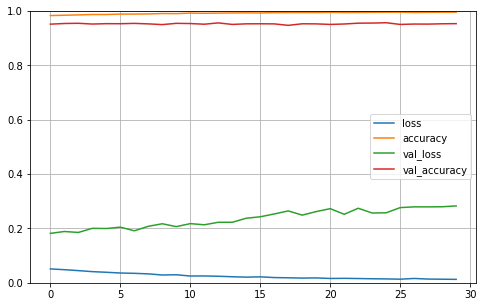

In [406]:
pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.savefig("learning_curves_model_5_rf", tight_layout=False)
plt.show()


**Comparison of Experiments 3,4 and 5**

